In [158]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Travis Deason

# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [254]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from __future__ import print_function


ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')

#>>>>>>uncomment these<<<
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [162]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python

#>> uncomment 
pprint(ds.data[:10,:]) # prints out elements of the matrix
pprint(ds.target[:100]) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** If X has $n$ observations and $p$ features (columns), how many elements will the vector $w$ contain?

In [164]:
# Enter your answer here (or write code to calculate it)

# X = (n, p)
# w = (X.T*X)**(-1)* X.T * y

* **w will contain p elements**

________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [168]:
# Write you code here, print the values of the regression weights 
# using the 'print()' function in python

def get_w_values(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)

X= ds.data
y= ds.target
w_linal = get_w_values(X, y)

In [170]:
print(w_linal)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [217]:
# write your code here, print the values of model by accessing 
#    its properties that you looked up from the API
from sklearn.linear_model import LinearRegression
model = LinearRegression(True, n_jobs=-1)
fitted = model.fit(X, y)
w_sklearn = model.coef_

ss_diff = sum([(x-y)**2 for x,y in zip(w_sklearn, w_linal)])

In [228]:
print('model coefficients are:\n', coefs)
print('model intercept is:\n', coefs[0])
print("Answer to question is:\n",
      "Yes they are virtually the same params\n",
      "\tNet diffirence between params is {:.3E}"\
      .format(ss_diff))

model coefficients are:
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
model intercept is:
 -10.0121978175
Answer to question is:
 Yes they are virtually the same params
 	Net diffirence between params is 2.822E-19


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$

Where $X$ is a matrix with example instances in *each row* of the matrix. 

**Exercise 3:** 
-  Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$ and also using the sklearn regression object, $\hat{y}_{sklearn}$.


In [140]:
import pandas as pd
%matplotlib inline

Sum Squared Error between sklearn and linear algebra method:
	 1.17854732253e-20
Max diff between sklearn and linear algebra method:
	 1.7564616428e-11


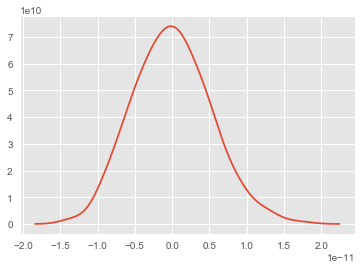

In [367]:
# Use this block to answer the questions

y_predict = np.dot(X,w_linal.T) + \
    y.mean() - np.dot(w_linal, np.apply_along_axis(np.mean, 0, X))

y_sklearn = model.predict(X)

## these values are kind of useless because there are 442 of them
## this makes them hard to observe
# print(y_numpy)
# print(y_sklearn)

# I believe this is a better measurement (KDE plot)
sns.kdeplot((y_predict - y_sklearn))
print("Sum Squared Error between sklearn and linear algebra method:\n\t"
      ,sum([(x-y)**2 for x,y in zip(y_predict, y_sklearn)]))
print("Max diff between sklearn and linear algebra method:\n\t"
       ,(np.abs(y_predict - y_sklearn)).max())

________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification

________________________________________________________________________________________________________

**Exercise 4:** In this exercise you need to make sure the response variable is binary (0,1).
Now use linear regression to come up with a set of weights, `w`, that predict the class value. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video. Remember to account for the bias term when constructing the feature matrix, `X`. Print the weights of the linear classifier.

In [67]:
from sklearn.linear_model import LogisticRegression

In [272]:
y_normed = y / y.max()
y_binary = y_normed > y_normed.mean()
print(y_binary[::20])

[False False False False False False  True False False False  True False
  True False  True  True False  True  True False  True False  True]


In [268]:
# write your code here and print the values of the weights 


w_linear_log = get_w_values(X, y_binary)


model_reg = LogisticRegression()
fitted = model_reg.fit(X, y_binary)

w_log_sklearn = model_reg.coef_
print("coefficents (SkLearn):\n{}".format(w_log_sklearn))
print("coefficents (Linear Algebra):\n{}".format(w_linear_log))

coefficents (SkLearn):
[[ 0.71130401 -0.38798293  2.91661179  2.51574778  0.72613598  0.38726876
  -1.78049531  1.74388505  3.00411508  1.70792293]]
coefficents (Linear Algebra):
[-0.12012891 -1.48152806  2.12440139  2.2044744  -5.62472911  4.00337706
  1.0335526   0.75966083  4.84794675  0.37976139]


________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

In [334]:
sklearn_preds = model_reg.predict(X)
linal_log_coefs = (np.dot(X,w_linear_log.T) + \
    y_binary.mean() - np.dot(w_linear_log, np.apply_along_axis(np.mean, 0, X)))
linal_log_preds = linal_log_coefs > .45

In [337]:
from sklearn.metrics import roc_curve, accuracy_score

In [363]:
acc = {}
for i in np.linspace(0,1, 10000):
    linal_log_preds = linal_log_coefs > i
    acc[i] = float((linal_log_preds == y_binary).sum()) / y.size
lineal_acc = pd.Series(acc)

The Ideal hardthreshold value is at :
	 0.414741474147


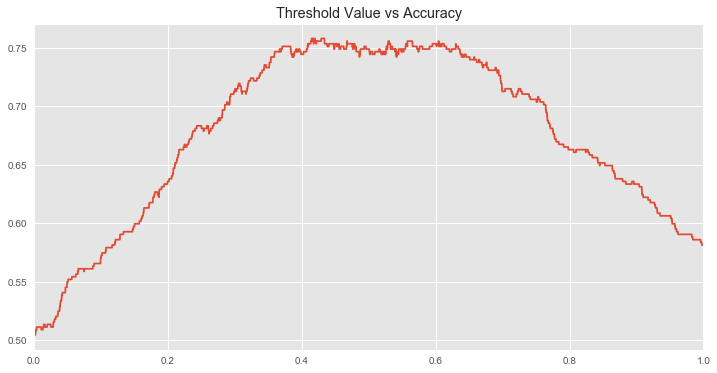

In [364]:
lineal_acc.plot(figsize=(12,6), title="Threshold Value vs Accuracy")
print("The Ideal hardthreshold value is at :\n\t", lineal_acc.idxmax())
linal_log_preds = linal_log_coefs > lineal_acc.idxmax()

In [365]:
# use this box to predict the classification output
accuracy_sklearn = float((sklearn_preds == y_binary).sum()) / y.size
accuracy_linlog = float((linal_log_preds == y_binary).sum()) / y.size

In [366]:
## this assumes the classification threshold is the mean
print('Percentage_accuracy (SkLearn):\n\t', accuracy_sklearn)
print('Percentage_accuracy (Linear Algebra):\n\t', accuracy_linlog)

Percentage_accuracy (SkLearn):
	 0.751131221719457
Percentage_accuracy (Linear Algebra):
	 0.7579185520361991


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.